# ML-8. Продвинутые методы машинного обучения

# 1. Введение

→ В прошлом модуле мы научились важному этапу в разработке модели — поиску оптимальных гиперпараметров. Этот этап важен для получения лучшего качества модели. 

В этом модуле мы поговорим о способах ансамблирования и сбора в пайплайн как о дальнейшем шаге развёртывания модели. Дальнейшим этапом в освоении профессии дата-сайентиста станет погружение в тематику задач и основных методов решения задач **metric learning**.

⬇️ Прежде чем приступить к освоению ансамблирования и пайплайнов, предлагаем пройти небольшой тест, чтобы освежить знания об архитектуре моделей машинного обучения.

### О чём этот модуль?

Вспомнив основные понятия при работе с данными, мы можем перейти к краткому ознакомлению с темами модуля. 

### Ансамблирование моделей

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как случайный лес. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства.    

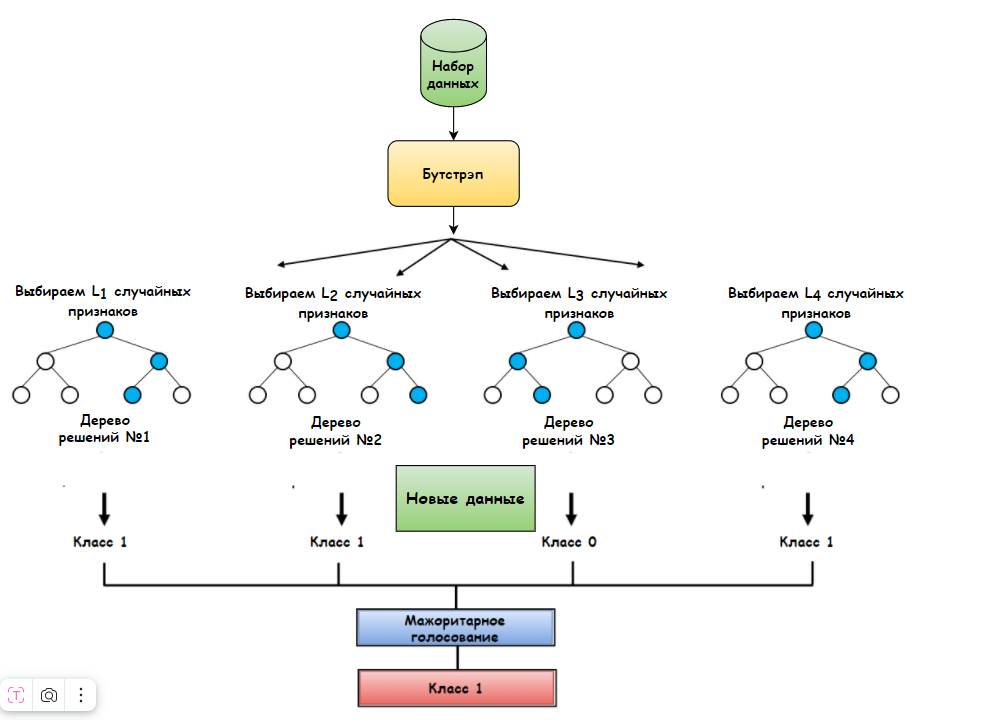

Этот знакомый нам подход построения ансамбля называется **бэггингом** и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.

### Pipeline

Как известно, любая задача классического машинного обучения сводится к этапам обработки данных с последующей генерацией признаков. Позднее признаки отбираются и подаются на модель, которую в свою очередь обучают и настраивают, находя оптимальные гиперпараметры. Качество модели проверяют с помощью методов валидации (например, **кросс-валидации**). 

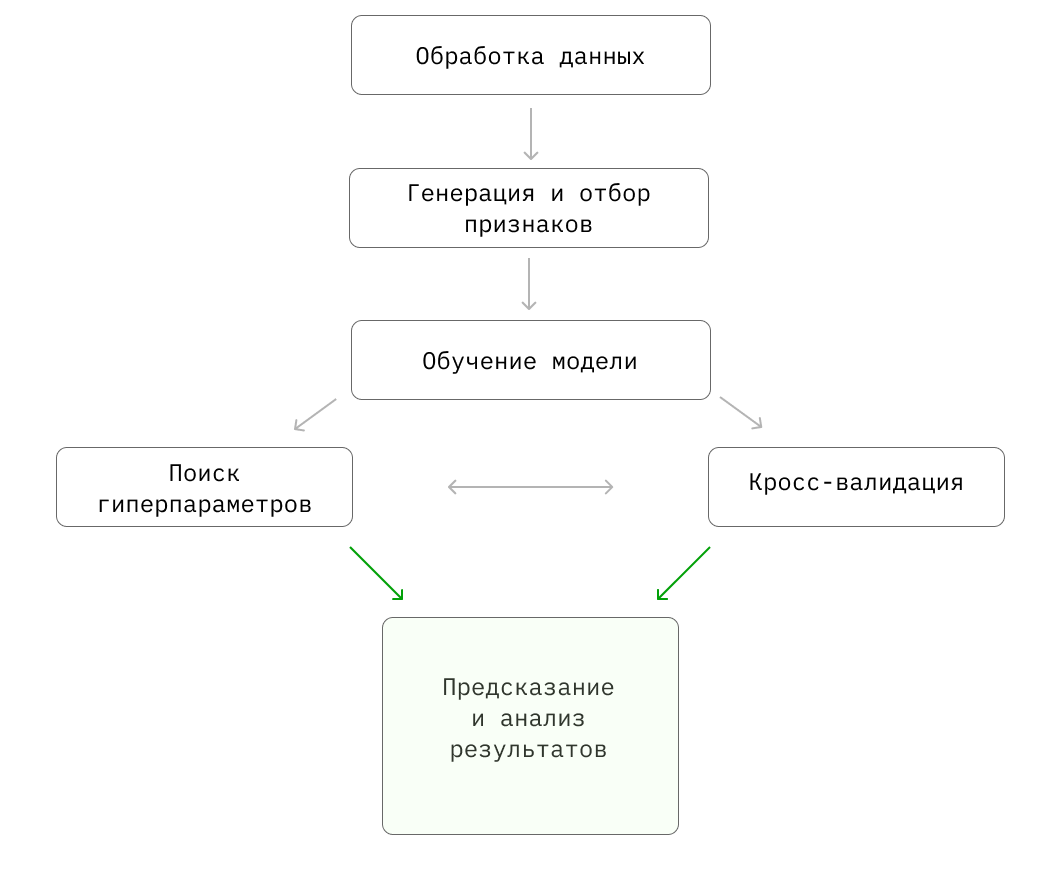

Процесс автоматического поэтапного выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества называется **пайплайном**. 

### Metric Learning

Любые подходы в машинном обучении, которые требуют измерения расстояния между объектами в выборке, являются подходами **metric learning** (часто их обозначают как **метрические алгоритмы**). Основными задачами, решаемыми подходами metric learning, наряду с классическими задачами обучения с учителем, являются задача **кластеризации** и задача **понижения размерности**. Также metric learning иногда используется в задачах восстановления данных по принципу нахождения ближайшего похоже объекта.

В этом модуле мы научимся применять на практике основные методы и подходы metric learning, в частности **kNN, k-means**.

#### Цели модуля

Целями модуля являются:

✔️ Научиться самостоятельно ансамблировать различными методами модели для повышения качества предсказаний.

✔️ Освоить практические методы создания пайплайнов и создать свой.

✔️ Применить подходы metric learning на практике.

# 2. Ансамблирование: бэггинг, случайный лес

→ Основным подходом для улучшения качества слабых и нестабильных моделей является обучение моделей для решения одной и той же поставленной задачи с последующим объединением и получением некоторого более сильного и стабильного консенсус-решения.  Как мы знаем, модели, используемые для ансамблирования, называются **базовыми**.